In [1]:
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes
dm=load_diabetes(as_frame=True,scaled=False)

In [3]:
type(dm)

sklearn.utils._bunch.Bunch

In [4]:
dm

{'data':       age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
 0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
 1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
 2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
 3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
 4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
 ..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
 437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
 438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
 439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
 440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
 441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0
 
 [442 rows x 10 columns],
 'target': 0      151.0
 1       75.0
 2      141.0
 3      206.0
 4      135.0
        ...  
 437    178.0
 438

In [5]:
print(dm.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
dm.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [7]:
y_dm: pd.DataFrame= dm.target
y_dm.head()


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [8]:
y_dm.shape

(442,)

In [9]:
y_dm.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [10]:
dm_df: pd.DataFrame = dm.frame
dm_df.groupby('sex')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
1.0,235.0,149.021277,75.905781,25.0,85.5,140.0,200.0,346.0
2.0,207.0,155.666667,78.453313,39.0,88.0,141.0,220.5,341.0


In [11]:
x_dm: pd.DataFrame = dm.data
x_dm.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [12]:
x_dm.shape

(442, 10)

In [13]:
x_dm_mail = x_dm[x_dm['sex']==2]
x_dm_femail = x_dm[x_dm['sex']==1]

In [14]:
group1=x_dm_mail['bmi'].to_numpy()
group2=x_dm_femail['bmi'].to_numpy()
stats.ttest_ind(group1,group2,equal_var=False)

TtestResult(statistic=1.8662181072924342, pvalue=0.06267725120660174, df=439.11472589836126)

In [15]:
stats_value = {
    "column":[],
    "group1":[],
    "group2":[],
    "difference":[],
    "p_value":[],
    
}
for k in x_dm.columns:
    group1=x_dm_mail[k].to_numpy()
    group2=x_dm_femail[k].to_numpy()
    p_value=stats.ttest_ind(group1,group2,equal_var=False).pvalue
    
    stats_value["column"].append(k)
    stats_value["group1"].append(group1.mean())
    stats_value["group2"].append(group2.mean())
    stats_value["difference"].append(group1.mean()-group2.mean())   
    stats_value["p_value"].append(p_value)

stats_df=pd.DataFrame(stats_value)
stats_df

/usr/local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,column,group1,group2,difference,p_value
0,age,50.942029,46.382979,4.559050,2.355524e-04
1,sex,2.000000,1.000000,1.000000,0.000000e+00
2,bmi,26.790338,26.010638,0.779700,6.267725e-02
3,bp,98.194783,91.521957,6.672825,2.415634e-07
4,s1,190.439614,187.995745,2.443869,4.618114e-01
5,s2,120.056039,111.372340,8.683698,2.780987e-03
6,s3,44.570048,54.385106,-9.815058,7.023787e-17
7,s4,4.526377,3.668468,0.857909,1.078242e-12
8,s5,4.724760,4.567993,0.156767,1.591360e-03
9,s6,93.806763,89.017021,4.789742,9.919649e-06


In [16]:
x_bmi = x_dm[['bmi']]

In [17]:
x_bmi.shape

(442, 1)

In [18]:
type(x_bmi)

pandas.core.frame.DataFrame

In [19]:
from sklearn.linear_model import LinearRegression
model_bmi = LinearRegression()
model_bmi.fit(x_bmi,y_dm)


LinearRegression()

In [20]:
print("回帰係数:",model_bmi.coef_)
print("切片:",model_bmi.intercept_)

回帰係数: [10.23312787]
切片: -117.77336656656527


In [21]:
pre= pd.DataFrame([[20]])
pre

,0
0,20


In [22]:
model_bmi.predict(pre)

/usr/local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86.88919084])

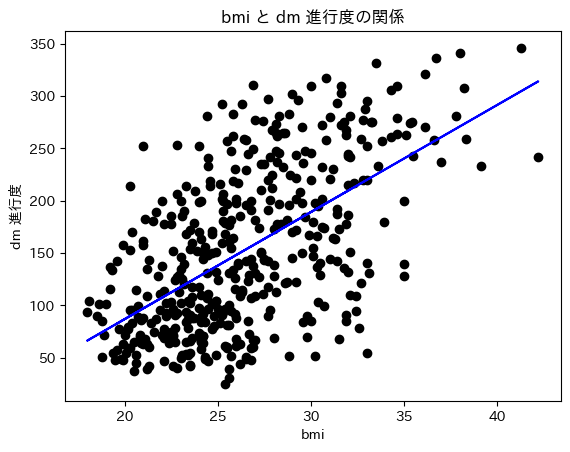

0.3439237602253802


In [23]:
plt.figure()
plt.title('bmi と dm 進行度の関係')
plt.scatter(x_bmi,y_dm,color='black')
plt.plot(x_bmi,model_bmi.predict(x_bmi),color='blue')
plt.xlabel('bmi')
plt.ylabel('dm 進行度')
plt.show()
print(model_bmi.score(x_bmi,y_dm))

In [24]:
model_dm10 = LinearRegression()
model_dm10.fit(x_dm,y_dm)

LinearRegression()

In [25]:
print("回帰係数:",model_dm10.coef_)
print("切片:",model_dm10.intercept_)

回帰係数: [-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
切片: -334.5671385187877


In [26]:
print(model_dm10.score(x_dm,y_dm))

0.5177484222203498


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_dm,y_dm,test_size=0.3,random_state=0)
model_dm = LinearRegression()
model_dm.fit(x_train,y_train)

LinearRegression()

In [28]:
print(model_dm.predict(x_test))
print(np.array(y_test))


[239.67646226 250.52785246 164.85108003 120.27660503 181.73443919
 262.21130761 112.23506474 191.94794432 151.49899378 236.97230238
 172.17064249 181.76621901 112.11999874  93.10380711 242.61242687
  91.18595934 153.65788928  64.67647092  99.36484095 212.26056138
 197.04060446 162.46365074 164.1435797  157.73720559 207.25521787
 170.20643739 111.97244286  82.77403445 186.91422667 164.71981545
 175.37450608  82.34705002 144.29011545 149.22311094 144.09055592
 194.25826256 166.5246271  188.10529014 126.97581238 205.91418409
  85.53291478 167.78048883 147.74631196 183.85195035 177.14599535
  71.92736587 139.84170986 139.03352655 125.11919021 231.42311603
 163.79321356  78.92705801 151.43615002 159.59655213 237.28482326
 176.12400723 191.69400387 118.93294883 131.10216716 174.80489902
 216.57056952 169.8778643  156.38489415 113.57318152 261.96434153
 155.57089274  84.32920798 228.12508784 208.51475188  46.18887137
  76.55796139 133.97122124 108.91396865 143.46955769 134.31142541
 190.24580

In [29]:
print(model_dm.score(x_test,y_test))

0.39289927216962883
